In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive

In [ ]:
# displot 한글 깨짐 
# !pip install matplotlib-venn

# import matplotlib.font_manager as fm

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list 

# plt.rcParams['font.family'] = 'AppleGothic'
# plt.rcParams['axes.unicode_minus'] = False

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
columns = ['장소 혼잡도 지표','최소 인구 평균','최대 인구 평균', '남성비율', '여성비율', '0~10세 실시간 인구비율', '10대 실시간 인구비율', '20대 실시간 인구비율', '30대 실시간 인구비율', '40대 실시간 인구비율', '50대 실시간 인구비율', '60대 실시간 인구비율', '70대 실시간 인구비율', '상주인구 비율', '실시간 업데이트시간', '기온', '체감온도', '습도', '강수량', '자외선 지수', '초미세먼지농도', '미세먼지농도', '(자치구)확진자수', '(자치구)확진자 추가', '서울 확진자수', '서울 확진자추가', '서울시 사망자수', '당일 사망자수','장소명'] 

In [ ]:
seoul_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/팀과제/df_tot.0219_13-0220_09csv.csv', encoding='cp949')

In [ ]:
seoul_df.info()

In [ ]:
seoul_df.columns = columns

In [ ]:
seoul_df.info()

In [ ]:
# 여유 - 0.5 , 보통 - 1.5 , 약간 붐빔-2.5, 붐빔 - 3.5
seoul_df['숫자지표'] = seoul_df['장소 혼잡도 지표'].apply(lambda x: 0.5 if x == '여유' else 1.5 if x=='보통' else 2.5 if x=='약간 붐빔' else 3.5)

In [ ]:
seoul_df.info()

In [ ]:
# 인구가 y값 종속변수, 나머지 독립변수
seoul_df['인구'] = seoul_df['최소 인구 평균'] +(seoul_df['최대 인구 평균']-seoul_df['최소 인구 평균'])/4 * seoul_df['숫자지표']

In [ ]:
pd.set_option('display.max_columns',50)

In [ ]:
seoul_df.head()

In [ ]:
# 데이트 타입으로 바꿔서 시간 가져오기
from datetime import datetime

seoul_df['실시간 업데이트시간'] = pd.to_datetime(seoul_df['실시간 업데이트시간'])

In [ ]:
seoul_df.info()

In [ ]:
days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
seoul_df['요일'] = seoul_df['실시간 업데이트시간'].dt.weekday
seoul_df['시간대'] = seoul_df['실시간 업데이트시간'].dt.hour

In [ ]:
seoul_df.head()

In [ ]:
seoul_df.info()

In [ ]:
seoul_df['주말여부'] = seoul_df['요일'].apply(lambda x: 0 if x in [ 0,1,2,3,4] else 1)

In [ ]:
seoul_df.tail()

In [ ]:
seoul_df.info()

In [ ]:
seoul_df.describe()

In [ ]:
seoul_df['강수량'].value_counts()

In [ ]:
# 강수량이 없을때는 '-'으로 데이터가 채워지므로 '0'으로 변환시켜줌
seoul_df['강수량'] = seoul_df['강수량'].replace('-', 0)

seoul_df['강수량'].value_counts()

> 🟡 50곳 지역 전체 분포 확인

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


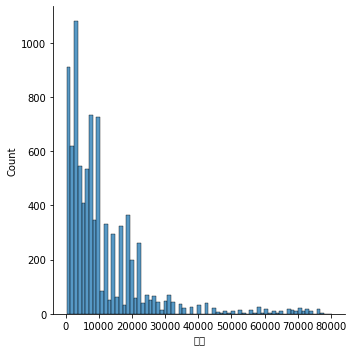

In [ ]:
# 50곳 지역 전체 인구 분포
sns.displot(seoul_df['인구'])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


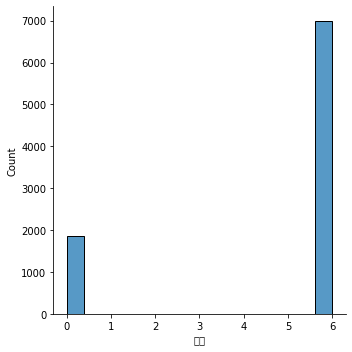

In [ ]:
# 50곳 지역 전체 평일/주말 분포
# 데이터가 일-월 밖에 없어서 0, 6만 존재함
sns.displot(seoul_df['요일'])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


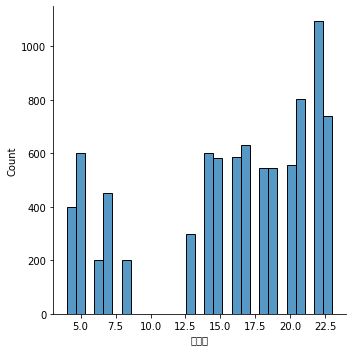

In [ ]:
# 50곳 지역 전체 시간대별 분포
# 8:15 - 13:30 사이 데이터 없음
sns.displot(seoul_df['시간대'])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


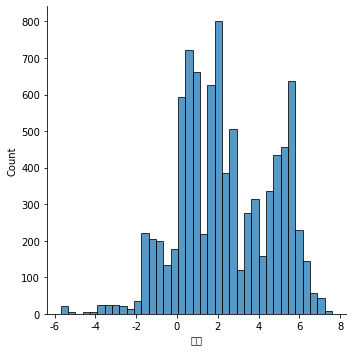

In [ ]:
# 50곳 지역 전체 온도별 분포
sns.displot(seoul_df['기온'])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0,

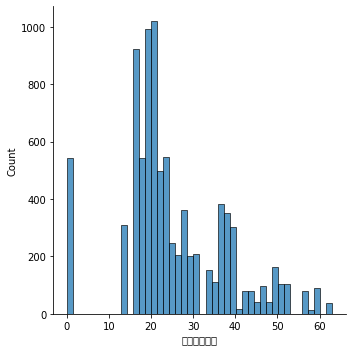

In [ ]:
# 50곳 지역 전체 미세번지농도별 분포
sns.displot(seoul_df['미세먼지농도'])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0,

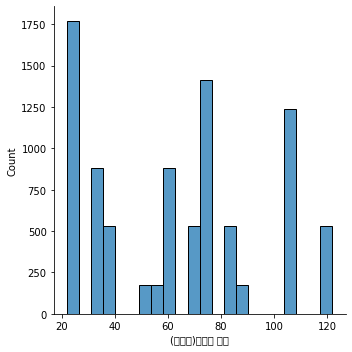

In [ ]:
# 50곳 지역 전체 코로나확진자추가별 분포
sns.displot(seoul_df['(자치구)확진자 추가'])

> 🟡 종속변수 드랍

In [ ]:
seoul_df.head()

In [ ]:
x_seoul_df = seoul_df.drop('인구', axis=1)

In [ ]:
x_seoul_df.head()

In [ ]:
# 별다른 특이점 없음
x_seoul_df.describe()

,최소 인구 평균,최대 인구 평균,남성비율,여성비율,0~10세 실시간 인구비율,10대 실시간 인구비율,20대 실시간 인구비율,30대 실시간 인구비율,40대 실시간 인구비율,50대 실시간 인구비율,60대 실시간 인구비율,70대 실시간 인구비율,상주인구 비율,기온,체감온도,습도,강수량,자외선 지수,초미세먼지농도,미세먼지농도,(자치구)확진자수,(자치구)확진자 추가,서울 확진자수,서울 확진자추가,서울시 사망자수,당일 사망자수,숫자지표,요일,시간대,주말여부
count,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.0,8840.000000,8840.000000,8840.000000,8840.000000,8840.000000,8840.0,8840.0,8840.0,8840.0,8840.000000,8840.000000,8840.000000,8840.000000
mean,10953.574661,12019.615385,49.728032,50.271968,0.415532,7.248756,25.570317,21.103518,16.970317,13.840271,9.256674,5.593710,23.412342,2.365396,2.692624,36.903846,0.0,0.687783,10.343665,25.291176,197392.373756,63.170136,5908302.0,1906.0,6323.0,1.0,0.828846,4.744344,15.958710,0.790724
std,12307.550946,12836.602859,5.186772,5.186772,0.365518,3.003404,10.270984,3.629263,4.290765,4.049320,3.283350,2.736138,16.542001,2.313839,1.953728,10.804783,0.0,0.950064,10.689151,12.433684,88931.874037,31.541248,0.0,0.0,0.0,0.0,0.707870,2.440889,5.994359,0.406815
min,200.000000,300.000000,34.700000,25.600000,0.000000,0.800000,4.900000,11.100000,5.800000,4.500000,2.500000,0.700000,0.400000,-5.700000,-2.900000,17.000000,0.0,0.000000,0.000000,0.000000,71006.000000,22.000000,5908302.0,1906.0,6323.0,1.0,0.500000,0.000000,4.000000,0.000000
25%,3000.000000,3500.000000,46.300000,47.300000,0.200000,5.400000,18.000000,18.200000,14.100000,11.000000,6.800000,3.600000,10.900000,0.600000,1.200000,29.000000,0.0,0.000000,6.000000,18.000000,121622.000000,34.000000,5908302.0,1906.0,6323.0,1.0,0.500000,6.000000,14.000000,1.000000
50%,7500.000000,8000.000000,49.600000,50.400000,0.300000,7.000000,23.800000,21.400000,17.100000,13.800000,9.000000,5.000000,18.300000,2.100000,2.600000,35.000000,0.0,0.000000,8.000000,22.000000,211731.000000,61.000000,5908302.0,1906.0,6323.0,1.0,0.500000,6.000000,17.000000,1.000000
75%,14000.000000,16000.000000,52.700000,53.700000,0.500000,8.700000,31.700000,23.700000,19.600000,16.500000,11.400000,7.100000,32.000000,4.400000,4.100000,42.000000,0.0,2.000000,10.000000,33.000000,238397.000000,82.000000,5908302.0,1906.0,6323.0,1.0,0.500000,6.000000,21.000000,1.000000
max,80000.000000,82000.000000,74.400000,65.300000,4.000000,19.200000,60.700000,32.500000,32.700000,29.600000,25.000000,15.800000,81.900000,7.600000,9.600000,88.000000,0.0,2.000000,57.000000,63.000000,386365.000000,122.000000,5908302.0,1906.0,6323.0,1.0,3.500000,6.000000,23.000000,1.000000


> 🟡 다중 선형회귀분석 test

In [ ]:
import statsmodels.api as sm

In [ ]:
# 기온, 미세먼지, 코로나, 주말여부
x_data = seoul_df[['기온', '미세먼지농도', '서울 확진자추가', '주말여부']] 
y = seoul_df[['인구']]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(y, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     인구   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     341.0
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          1.59e-209
Time:                        04:08:47   Log-Likelihood:                -95456.
No. Observations:                8840   AIC:                         1.909e+05
Df Residuals:                    8836   BIC:                         1.909e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.000     17.299      0.000       0.002       0.003
기온          1838.1156     73.918     24.867      0.000    1693.218    1983.013
미세먼지농도       -65.7734     12.618     -5.213      0.000     -90.508     -41.039
서울 확진자추가       4.8499      0.280     17.299      0.000       4.300       5.399
주말여부        -910.0647    465.273     -1.956      0.050   -1822.109       1.979
==============================================================================
Omnibus:                     4609.492   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32609.469
Skew:                           2.446   Prob(JB):                         0.00
Kurtosis:                      11.038   Cond. No.                     4.53e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.57e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

> 🟡 강남 MICE 관광특구 -> test

In [ ]:
KangNamMICE_df = seoul_df[seoul_df['장소명']=='강남 MICE 관광특구']

In [ ]:
KangNamMICE_df.info()

In [ ]:
KangNamMICE_df.describe()

In [ ]:
# 기온, 미세먼지, 코로나, 주말여부
KangNamMICE_data = KangNamMICE_df[['기온', '미세먼지농도', '(자치구)확진자 추가', '주말여부']] 
KangNamMICE_y = KangNamMICE_df['인구']

# for b0, 상수항 추가
KangNamMICE_data1 = sm.add_constant(KangNamMICE_data, has_constant = "add")

# OLS 검정
KangNamMICE_multi_model = sm.OLS(KangNamMICE_y, KangNamMICE_data1)
KangNamMICE_fitted_multi_model = KangNamMICE_multi_model.fit()
KangNamMICE_fitted_multi_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     인구   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     877.1
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          2.30e-104
Time:                        04:46:28   Log-Likelihood:                -1669.5
No. Observations:                 177   AIC:                             3347.
Df Residuals:                     173   BIC:                             3360.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0148      0.125      0.119      0.906      -0.231       0.261
기온           8347.0178    267.232     31.235      0.000    7819.562    8874.474
미세먼지농도       -160.7101     42.361     -3.794      0.000    -244.322     -77.098
(자치구)확진자 추가     1.5836     13.327      0.119      0.906     -24.721      27.888
주말여부        -1.025e+04   1291.457     -7.939      0.000   -1.28e+04   -7703.309
==============================================================================
Omnibus:                       13.049   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.292
Skew:                           0.580   Prob(JB):                     0.000788
Kurtosis:                       3.770   Cond. No.                     4.91e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

> 🟡 1위 역삼역

In [ ]:
YeokSamStation_df = seoul_df[seoul_df['장소명']=='역삼역']

In [ ]:
YeokSamStation_df.info()

In [ ]:
YeokSamStation_df.describe()

In [ ]:
# 기온, 미세먼지, 코로나, 주말여부
YeokSamStation_data = YeokSamStation_df[['기온', '미세먼지농도', '(자치구)확진자 추가', '주말여부']] 
YeokSamStation_y = YeokSamStation_df['인구']

# for b0, 상수항 추가
YeokSamStation_data1 = sm.add_constant(YeokSamStation_data, has_constant = "add")

# OLS 검정
YeokSamStation_multi_model = sm.OLS(YeokSamStation_y, YeokSamStation_data1)
YeokSamStation_fitted_multi_model = YeokSamStation_multi_model.fit()
YeokSamStation_fitted_multi_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     인구   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     14.26
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.39e-08
Time:                        04:45:56   Log-Likelihood:                -1600.1
No. Observations:                 177   AIC:                             3208.
Df Residuals:                     173   BIC:                             3221.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8101      0.084      9.601      0.000       0.644       0.977
기온            907.9693    180.697      5.025      0.000     551.315    1264.624
미세먼지농도        -43.6365     28.706     -1.520      0.130    -100.296      13.023
(자치구)확진자 추가    86.6791      9.028      9.601      0.000      68.860     104.499
주말여부        -2244.8038    872.396     -2.573      0.011   -3966.713    -522.894
==============================================================================
Omnibus:                      112.139   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.433
Skew:                           2.350   Prob(JB):                    6.82e-169
Kurtosis:                      12.106   Cond. No.                     4.91e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

> 🟡 2위 선릉역

In [ ]:
SeolleungStation_df = seoul_df[seoul_df['장소명']=='선릉역']

In [ ]:
SeolleungStation_df.info()

In [ ]:
SeolleungStation_df.describe()

In [ ]:
# 기온, 미세먼지, 코로나, 주말여부
SeolleungStation_data = SeolleungStation_df[['기온', '미세먼지농도', '(자치구)확진자 추가', '주말여부']] 
SeolleungStation_y = SeolleungStation_df['인구']

# for b0, 상수항 추가
SeolleungStation_data1 = sm.add_constant(SeolleungStation_data, has_constant = "add")

# OLS 검정
SeolleungStation_multi_model = sm.OLS(SeolleungStation_y, SeolleungStation_data1)
SeolleungStation_fitted_multi_model = SeolleungStation_multi_model.fit()
SeolleungStation_fitted_multi_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     인구   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     28.42
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           5.44e-15
Time:                        04:49:47   Log-Likelihood:                -1690.6
No. Observations:                 177   AIC:                             3389.
Df Residuals:                     173   BIC:                             3402.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.4416      0.140     10.267      0.000       1.164       1.719
기온           2072.5418    300.255      6.903      0.000    1479.907    2665.177
미세먼지농도        -89.8684     47.744     -1.882      0.061    -184.104       4.367
(자치구)확진자 추가   154.2536     15.025     10.267      0.000     124.598     183.909
주말여부        -4851.4572   1451.503     -3.342      0.001   -7716.393   -1986.521
==============================================================================
Omnibus:                       99.311   Durbin-Watson:                   0.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.387
Skew:                           2.082   Prob(JB):                    3.10e-125
Kurtosis:                      10.772   Cond. No.                     4.91e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.93e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

> 🟡 3위 여의도

In [ ]:
Yeouido_df = seoul_df[seoul_df['장소명']=='여의도']

In [ ]:
Yeouido_df.info()

In [ ]:
Yeouido_df.describe()

In [ ]:
# 기온, 미세먼지, 코로나, 주말여부
Yeouido_data = Yeouido_df[['기온', '미세먼지농도', '(자치구)확진자 추가', '주말여부']] 
Yeouido_y = Yeouido_df['인구']

# for b0, 상수항 추가
Yeouido_data1 = sm.add_constant(Yeouido_data, has_constant = "add")

# OLS 검정
Yeouido_multi_model = sm.OLS(Yeouido_y, Yeouido_data1)
Yeouido_fitted_multi_model = Yeouido_multi_model.fit()
Yeouido_fitted_multi_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     인구   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     94.74
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           2.58e-36
Time:                        04:52:40   Log-Likelihood:                -1884.7
No. Observations:                 177   AIC:                             3777.
Df Residuals:                     173   BIC:                             3790.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.0982      0.594      8.577      0.000       3.925       6.271
기온           1.151e+04    814.896     14.126      0.000    9902.448    1.31e+04
미세먼지농도       -149.3583     95.425     -1.565      0.119    -337.705      38.989
(자치구)확진자 추가   387.4615     45.176      8.577      0.000     298.294     476.629
주말여부        -2.291e+04   3466.203     -6.611      0.000   -2.98e+04   -1.61e+04
==============================================================================
Omnibus:                       94.062   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.944
Skew:                           1.990   Prob(JB):                    2.47e-107
Kurtosis:                      10.123   Cond. No.                     2.17e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

> 🟡 전체

In [ ]:
seoul_df.info()

In [ ]:
seoul_df.head()

In [ ]:
# 기온, 미세먼지, 코로나, 주말여부
seoul_data = seoul_df[['기온', '미세먼지농도', '(자치구)확진자 추가', '주말여부']] 
seoul_y = seoul_df['인구']

# for b0, 상수항 추가
seoul_data1 = sm.add_constant(seoul_data, has_constant = "add")

# OLS 검정
seoul_multi_model = sm.OLS(seoul_y, seoul_data1)
seoul_fitted_multi_model = seoul_multi_model.fit()
seoul_fitted_multi_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     인구   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     428.1
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        04:57:57   Log-Likelihood:                -95157.
No. Observations:                8840   AIC:                         1.903e+05
Df Residuals:                    8835   BIC:                         1.904e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4861.7924    545.868      8.907      0.000    3791.764    5931.821
기온           1829.6792     71.466     25.602      0.000    1689.590    1969.768
미세먼지농도       -115.7194     12.364     -9.360      0.000    -139.955     -91.484
(자치구)확진자 추가    97.6577      3.928     24.863      0.000      89.958     105.357
주말여부        -1547.2633    450.559     -3.434      0.001   -2430.463    -664.063
==============================================================================
Omnibus:                     4223.862   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27468.687
Skew:                           2.222   Prob(JB):                         0.00
Kurtosis:                      10.405   Cond. No.                         409.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""